<a href="https://colab.research.google.com/github/ravinasha/mac/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Stock Price Prediction**
Predicting stock prices is one of the most popular applications of machine learning. This project involves using historical data to train a model that can predict future stock prices accurately.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



**Data** **Understanding**

In [ ]:
df=pd.read_csv("/content/Historical_Data.csv")

In [ ]:
df.head()

,Date,Article_ID,Country_Code,Sold_Units
0,20170817,1132,AT,1
1,20170818,1132,AT,1
2,20170821,1132,AT,1
3,20170822,1132,AT,1
4,20170906,1132,AT,1


In [ ]:
df.sample(10)

,Date,Article_ID,Country_Code,Sold_Units
1860,20181129,5984,FI,2
1760,20180220,5984,FI,1
3802,20170501,3446,SE,1
3876,20171024,3446,SE,4
3739,20190201,2902,SE,1
2599,20180216,1516,FR,2
974,20180224,332,FI,2
3366,20180525,332,SE,3
3701,20181123,2902,SE,10
537,20170327,3576,AT,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          4849 non-null   int64 
 1   Article_ID    4849 non-null   int64 
 2   Country_Code  4849 non-null   object
 3   Sold_Units    4849 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 151.7+ KB


In [ ]:
df.isnull().sum()

Date            0
Article_ID      0
Country_Code    0
Sold_Units      0
dtype: int64

In [ ]:
df.shape


(4849, 4)

In [ ]:
df.describe()

,Date,Article_ID,Sold_Units
count,4.849000e+03,4849.00000,4849.000000
mean,2.017794e+07,2314.55331,1.966797
std,5.981690e+03,1813.23926,2.373171
min,2.017010e+07,332.00000,1.000000
25%,2.017093e+07,409.00000,1.000000
50%,2.018041e+07,1923.00000,1.000000
75%,2.018092e+07,3448.00000,2.000000
max,2.019021e+07,5984.00000,101.000000


In [ ]:
df.duplicated().sum()

0

**Data** **Preprocessing**

In [ ]:
def preprocess_data(data, lookback):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)

    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

lookback = 60

X, y, scaler = preprocess_data(df['Sold_Units'].values.reshape(-1, 1), lookback)

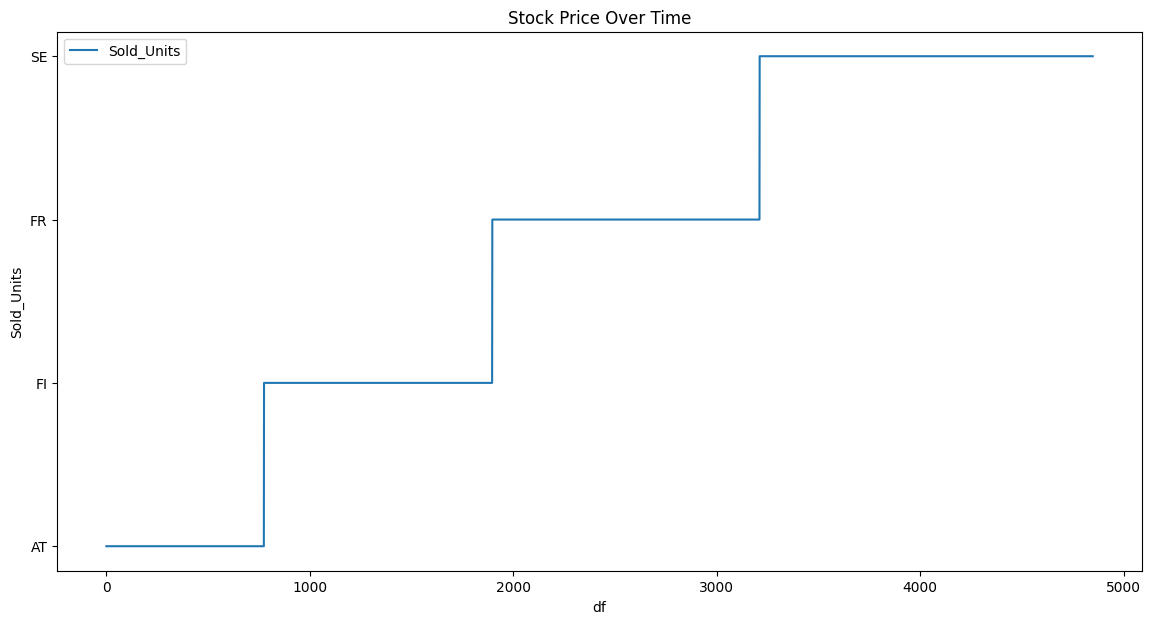

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Country_Code'], label='Sold_Units')
plt.title('Stock Price Over Time')
plt.xlabel('df')
plt.ylabel('Sold_Units')
plt.legend()
plt.show()


In [ ]:
df['Country_Code1'] = df['Sold_Units'].shift(1)
df['Country_Code2'] = df['Sold_Units'].shift(2)
df['Country_Code3'] = df['Sold_Units'].shift(3)
df['Country_Code7'] = df['Sold_Units'].shift(7)
df = df.dropna()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3831, 60, 1)
X_test shape: (958, 60, 1)
y_train shape: (3831,)
y_test shape: (958,)


In [ ]:
import numpy as np

# Reshape X if needed
if X_train.ndim == 3:
    X_train = X_train.reshape(X_train.shape[0], -1)
if X_test.ndim == 3:
    X_test = X_test.reshape(X_test.shape[0], -1)

# Ensure y is a 1-dimensional array
if y_train.ndim == 2:
    y_train = y_train.ravel()
if y_test.ndim == 2:
    y_test = y_test.ravel()

print("Reshaped X_train shape:", X_train.shape)
print("Reshaped X_test shape:", X_test.shape)
print("Reshaped y_train shape:", y_train.shape)
print("Reshaped y_test shape:", y_test.shape)


Reshaped X_train shape: (3831, 60)
Reshaped X_test shape: (958, 60)
Reshaped y_train shape: (3831,)
Reshaped y_test shape: (958,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R2: {r2_lr}")


Linear Regression - MSE: 0.0014625012050494264, MAE: 0.013965259641452414, R2: 0.18304398511534525


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R2: {r2_rf}")


Random Forest - MSE: 0.001620474759916493, MAE: 0.01579582463465553, R2: 0.09479965041272898


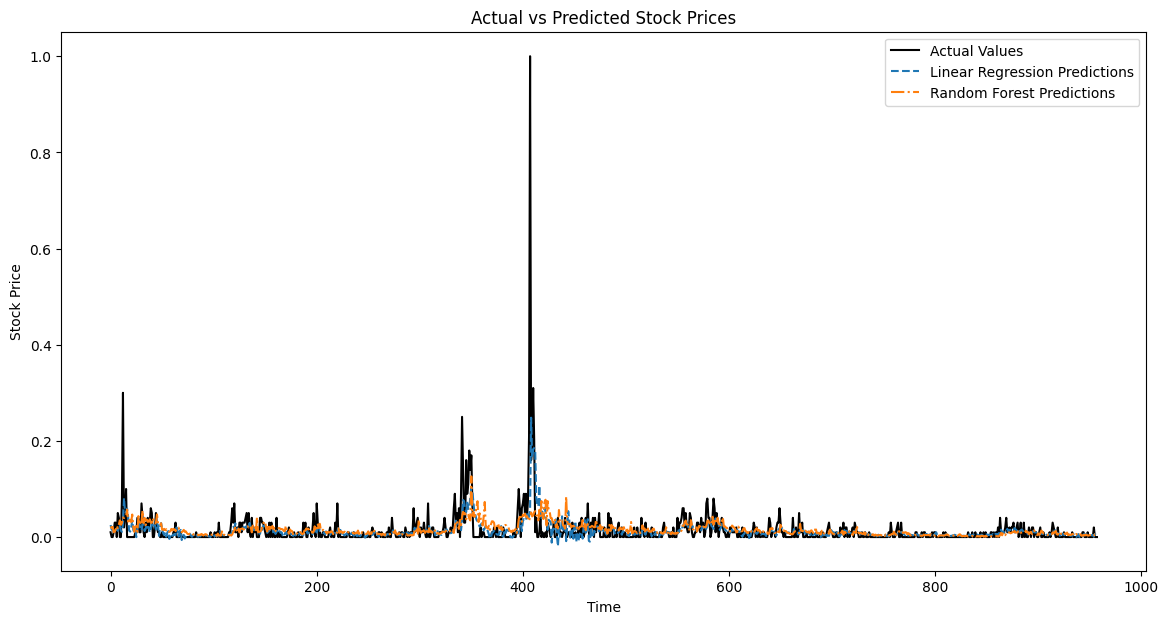

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for each model
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Values', color='black')

plt.plot(y_pred_lr, label='Linear Regression Predictions', linestyle='--')
plt.plot(y_pred_rf, label='Random Forest Predictions', linestyle='-.')

plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
120/120 [==============================] - 16s 89ms/step - loss: 2.4472e-04
Epoch 2/5
120/120 [==============================] - 14s 113ms/step - loss: 2.3446e-04
Epoch 3/5
120/120 [==============================] - 10s 83ms/step - loss: 2.3101e-04
Epoch 4/5
120/120 [==============================] - 12s 104ms/step - loss: 2.2644e-04
Epoch 5/5
120/120 [==============================] - 12s 103ms/step - loss: 2.2319e-04


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

30/30 [==============================] - 1s 19ms/step


Mean Squared Error (MSE): 4.85270342825061
Mean Absolute Error (MAE): 1.8218806533873206
Root Mean Squared Error (RMSE): 2.2028852508132624
R-squared (R2): -2709.729564169309


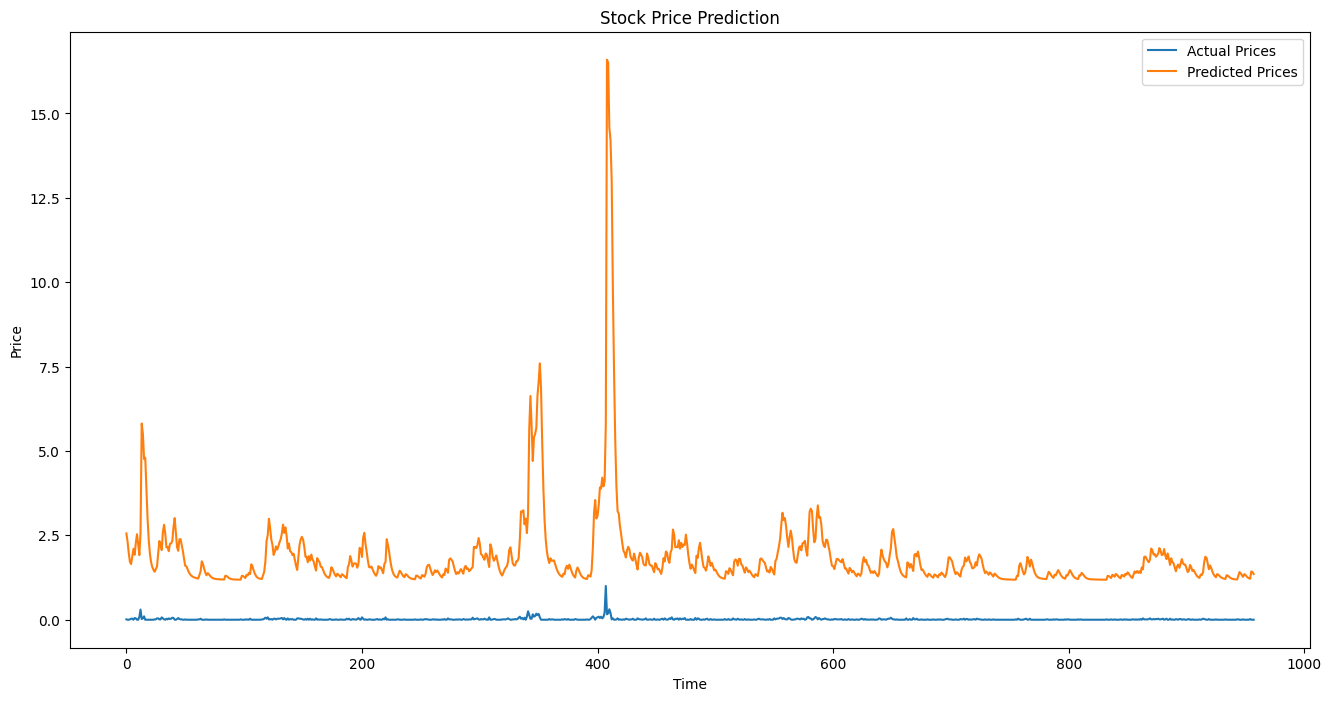

In [ ]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

plt.figure(figsize=(16, 8))
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()